### What is a Feedforward Neural Network?

A Feedforward Neural Network (FNN) is the **simplest type of neural network**.

- Data moves only in **one direction**
- No loops or feedback
- Used for prediction and classification

In [1]:
print('Input → Hidden Layer → Output')

Input → Hidden Layer → Output


### Simple FNN using NumPy 

This example shows how a neural network works internally using **matrix multiplication**.

In [4]:
import numpy as np

# Input data
X = np.array([[1, 2,3]])

# Weights and bias
W = np.array([[0.5], [0.8],[0.9]])
b = 0.1

# Forward pass
output = np.dot(X, W) + b
print('Network Output:', output)

Network Output: [[4.9]]


### What is the relevance of adding weights and bias in Neural Network?
In a Feedforward Neural Network (FNN), weights and biases are the fundamental parameters that give the network its learning capacity and expressive power.

### 1. Role of Weights

### a) Control the strength of input influence

Weights determine **how strongly each input feature affects a neuron’s output**.

Mathematically, for a neuron:
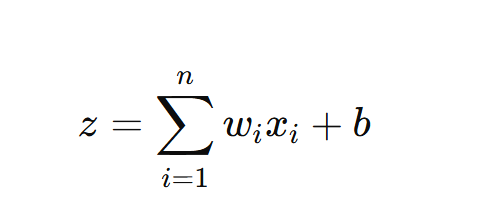
* A **large positive weight** amplifies the input.
* A **negative weight** inverts the influence.
* A **near-zero weight** effectively ignores the input.

Without weights, all inputs would contribute equally, making learning impossible.

---

### b) Enable feature learning

During training, weight updates allow the network to:

* Identify **important features**
* Suppress **irrelevant or noisy features**
* Learn complex patterns across layers (hierarchical representations)

This is the core mechanism by which FNNs generalize from data.

---

### c) Shape the decision boundary

Weights define the **orientation and curvature of decision boundaries** in the input space.

* Linear models learn straight boundaries
* Multi-layer FNNs with non-linear activations learn **highly non-linear boundaries**

---

### 2. Role of Bias

### a) Shift the activation function

Bias allows the activation function to be **shifted left or right**, instead of being forced to pass through the origin.

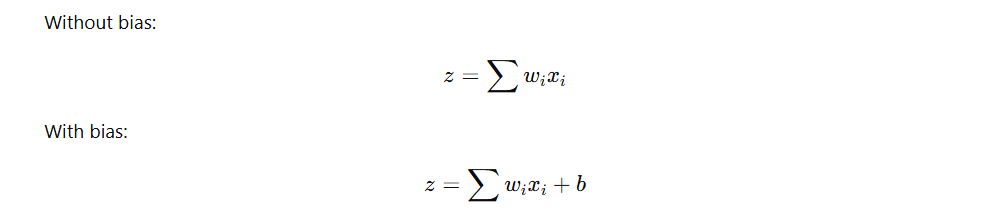

This means:

* The neuron can activate even when inputs are zero
* The network gains flexibility in fitting real-world data

---

### b) Improves model expressiveness

Bias acts as an **intercept term**, similar to linear regression.
It allows neurons to:

* Learn thresholds
* Model asymmetrical patterns
* Fit data that is not centered around zero

Without bias, many patterns would be impossible or inefficient to learn.

---

### c) Stabilizes learning

Bias helps neurons activate in useful regions of the activation function (e.g., avoiding dead ReLUs), improving:

* Convergence speed
* Gradient flow
* Training stability

---

## 3. Why Both Are Necessary (Together)

| Component    | What Happens If Removed                  |
| ------------ | ---------------------------------------- |
| No Weights   | No learning; all inputs treated the same |
| No Bias      | Limited expressiveness; poor fit to data |
| Both Present | Flexible, learnable, expressive model    |

Weights learn **what to pay attention to**, while bias learns **when to activate**.

---

## 4. Intuitive Analogy

Think of a neuron as a **decision-maker**:

* **Weights** are the importance given to each factor
* **Bias** is the baseline tendency to say “yes” or “no”

Both are required for nuanced decisions.

---

## 5. Summary

* **Weights** define input importance and shape decision boundaries
* **Bias** provides flexibility by shifting activation thresholds
* Together, they enable FNNs to learn complex, non-linear relationships
* Removing either severely limits the network’s learning capability




### Feedforward Neural Network using PyTorch



- PyTorch is an open-source deep learning library developed by Facebook’s AI Research (FAIR).
- PyTorch builds the computational graph on the fly, meaning the graph is created as the code runs.This makes it easier to debug and modify networks dynamically—very useful when experimenting with different FNN architectures.

**Backpropagation is handled automatically by PyTorch’s autograd engine**

- Tracks computations
- Computes gradients
- Optimizes weights

In [5]:
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()
x = torch.tensor([[1.0, 2.0]])
print('Output:', model(x))

Output: tensor([[1.0516]], grad_fn=<AddmmBackward0>)


### What Are Tensors in PyTorch?
- A tensor is the core data structure in PyTorch.
- You can think of a tensor as a generalized NumPy array, but with extra powers:


### Training a Feedforward Network 

Here we train a neural network to learn **y = x × 2**.

In [6]:
import torch.optim as optim

X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

model = nn.Linear(1, 1)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(200):
    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('Learned Weight:', model.weight.item())
print('Learned Bias:', model.bias.item())

Learned Weight: 1.969132661819458
Learned Bias: 0.09075362980365753


### Key Takeaways

- Feedforward Neural Networks are the **foundation** of GANs
- Generator and Discriminator are both FNNs (initially)
